# Evaluating the Utility of MODIS-Based Aerosol Optical Depth Measurements to Verify Brick Kiln Emissions Reductions
# Observing if any trend in AOD over Nepal following the 2015 earthquake can be observed
In on April 25, 2015, 350 of Nepal's 800 brick kilns were completely or partially affected by a magnitude 7.8 earthquake. 105 of these were in the Kathmandu valley. There could not be a larger emissions reduction "event" in the recent history of this country, and all emissions from the Nepalese brick kiln industry in Nepal (including aerosols like black carbon and SOx) must surely have dropped significantly. These aerosols have both significant human health effects, but also climate forcing effects. A reasonable estimate would be that emissions dropped roughly 350/800 = 44% or so, at least for a short period of time, following this earthquake. 

This serves as a perfect natural experiment to observe the ability of various remote sensing networks to detect reductions in aerosol emissions. If a remote sensing network shows no statistically significant change in emissions immediately after the April 25, 2015 earthquake, when the entire industry reduced emissions to such a high degree in such a short time, this remote sensing will surely be totally unable to detect smaller magnitude changes which occur as a result of technology improvements with smaller overall magnitude emission reductions spread out over a longer period of time.  

To focus on a region which appeared to be an epicenter for destruction, I will examine impacts on AOD and PM2.5 concentrations in the Kathmandu valley before and after April 25, 2015. I will use the following remote sensing networks:

* The NASA MODIS satellite's Aerosol Optical Depth dataset. I will use the 8-day temporal resolution dataset, which appears to include complete coverage minus cloud cover for Nepal. 
* Sensor based PM monitoring in the region. 

My hypothesis is that a statistically significant decrease in proxy measures of particulates and black carbon (AOD and PM measures, respectively for MODIS and sensor based data) is observable before and after the April 25, 2015 earthquake.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

#import gdal
import requests

import os

## Open Previously Scraped MODIS AOD Data
This data was already pulled using the script 'kathmandu_modis_aod_scraper.ipynb'. This was written into a CSV file. 

In [8]:
os.getcwd()

'c:\\Users\\tobias.schultz\\OneDrive - SCS Global Services\\Python\\nepal-remote-sensing-options'

In [18]:
katdf = pd.read_csv('data\\kathmandu_valley_8dayaod.csv')
katdf['Date of 8-day Window']=pd.to_datetime(katdf['Date of 8-day Window']) #Convert this column to date time. 
katdf=katdf.drop(columns=['Unnamed: 0']) #Drop this column which inserts intself


In [20]:

print(f'Shape of the input dataframe: {katdf.shape}')
#print(f'Info about this dataframe: {katdf.info()}')
print(f"Description of this dataframe: ")
print(katdf.describe())

Shape of the input dataframe: (574, 8)
Description of this dataframe: 
       Number of Pixels  Average AOD  5% Percentile AOD  \
count             574.0   472.000000         472.000000   
mean              100.0     0.510398           0.236072   
std                 0.0     0.206708           0.188864   
min               100.0     0.100786           0.000000   
25%               100.0     0.358858           0.102362   
50%               100.0     0.497077           0.184055   
75%               100.0     0.650706           0.313150   
max               100.0     1.000000           1.000000   

       50% Percentile (Median) AOD  95% Percentile AOD  \
count                   472.000000          472.000000   
mean                      0.531611            0.765140   
std                       0.242100            0.236916   
min                       0.079000            0.133465   
25%                       0.344488            0.603150   
50%                       0.514890            0.8

<AxesSubplot:xlabel='Date of 8-day Window'>

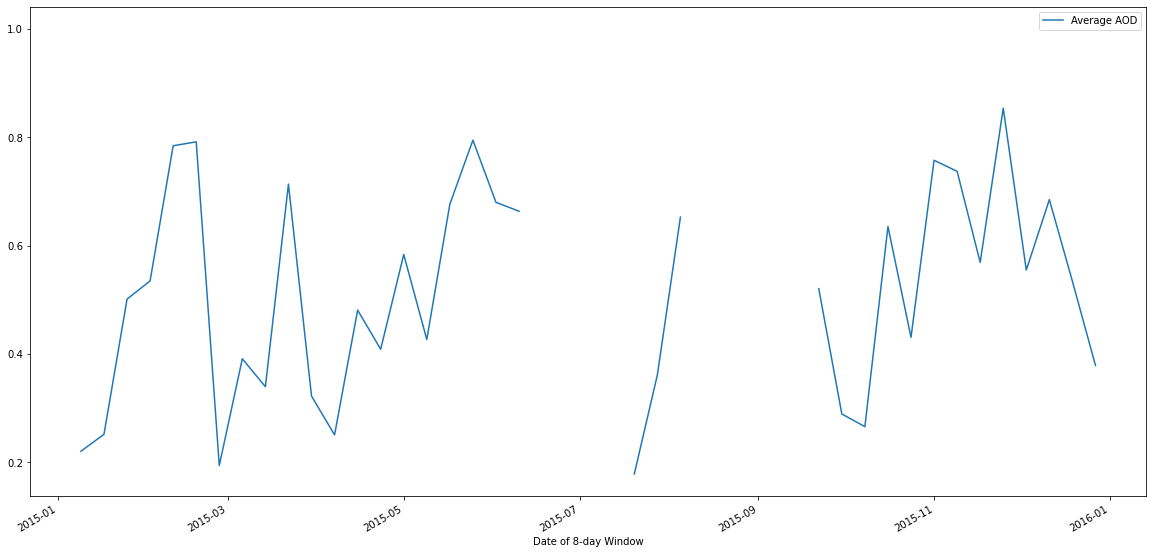

In [28]:
#Review the trend
focused = katdf[katdf['Date of 8-day Window']>'1-1-2015']
focused = focused[focused['Date of 8-day Window']<'12-31-2015']
focused.plot(x='Date of 8-day Window',y='Average AOD',figsize=(20,10))